## **Song Popularity Prediction of Indian Songs using Spotify API Data:**



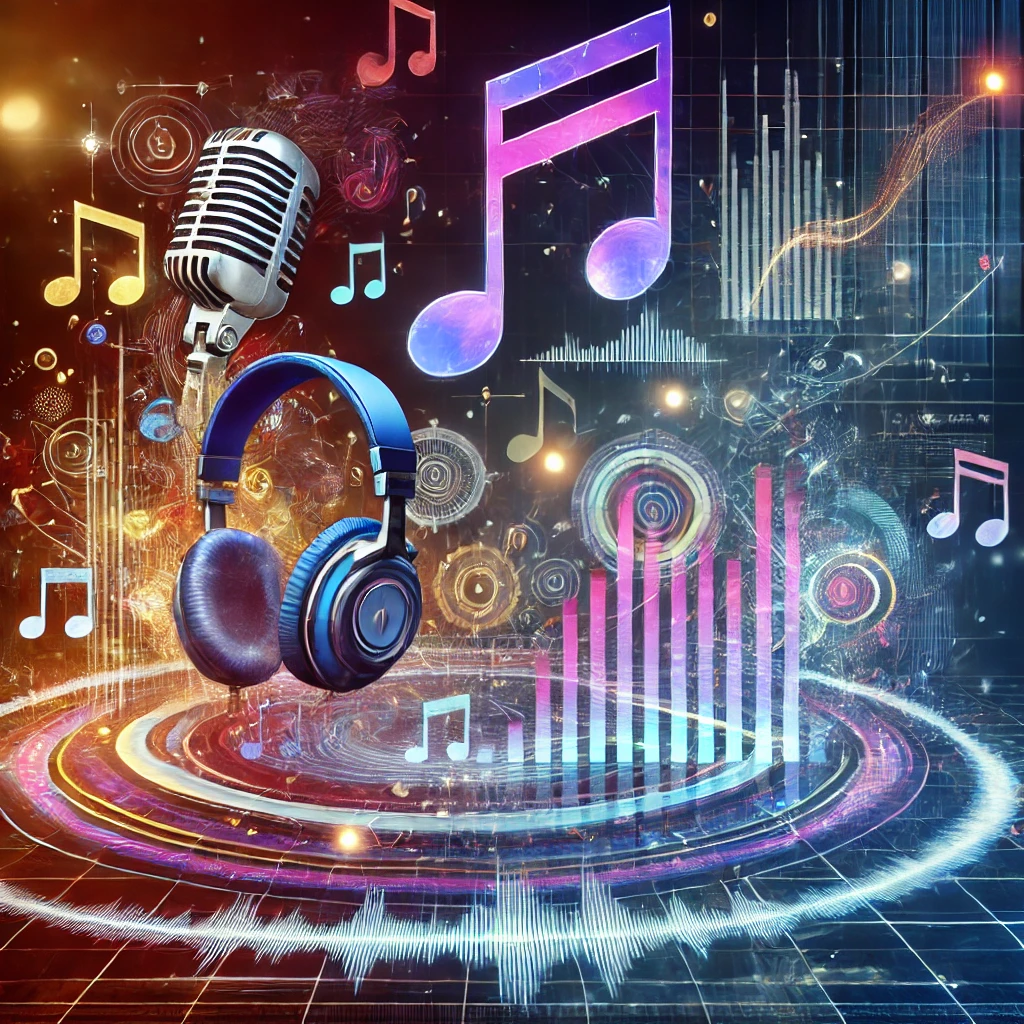

# **Exploratory Data Analysis**

In [3]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = '/content/indian_tracks_2023_2024_with_features.csv'  # Replace with your dataset path
dataset = pd.read_csv(file_path)

# General Information
print("Dataset Shape:", dataset.shape)
print("Missing Values:\n", dataset.isnull().sum())
print("\nDataset Info:")
print(dataset.info())


Dataset Shape: (50441, 20)
Missing Values:
 track_name          0
artist              0
album               1
release_date        0
popularity          0
track_id            0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50441 entries, 0 to 50440
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        50441 non-null  object 
 1   artist            50441 non-null  object 
 2   album             50440 non-null  object 
 3   release_date      50441 non-null  object 
 4   popularity        50441 non-null  int64  
 5   track_id          50441 non-null  object 
 6 

We can see the shape of dataset i.e, 50441 Rows and 20 Columns.

About the missing values in all the columns, there is only row is Null in the Album column.

In [4]:
# View the first few rows
print("\nFirst 5 Rows:")
print(dataset.head())



First 5 Rows:
                                          track_name                 artist  \
0     Shri Ram Jai Ram Jai Jai Ram (Gondavale chant)   Ramana Balachandhran   
1                               Ramachandraya Janaka         Sooryagayathri   
2                                        Ramashtakam    Uthara Unnikrishnan   
3                                    Sri ram jayaram  Gayathri Girish, Team   
4  Pet Lovers Anthem (Paal Mazhayin Thooralil) (F...        Rajhesh Vaidhya   

                                               album release_date  popularity  \
0     Shri Ram Jai Ram Jai Jai Ram (Gondavale chant)    3/12/2023          28   
1                               Ramachandraya Janaka   11/30/2023          26   
2                                        Ramashtakam    3/16/2023          27   
3  Yogi Ramsuratkumar Ashram Padalgal Volume 1 Ga...     5/9/2023          23   
4  Pet Lovers Anthem (Paal Mazhayin Thooralil) (F...     8/9/2023          20   

                 track_

Displayed first few rows of dataset.

In [5]:

# Statistical Summary
print("\nSummary Statistics:")
print(dataset.describe())




Summary Statistics:
         popularity          year  danceability        energy           key  \
count  50441.000000  50441.000000  50441.000000  50441.000000  50441.000000   
mean      17.442715   2023.479194      0.582485      0.601653      5.258718   
std       20.727506      0.499572      0.148752      0.203510      3.492543   
min        0.000000   2023.000000      0.064000      0.003520      0.000000   
25%        0.000000   2023.000000      0.477000      0.459000      2.000000   
50%        7.000000   2023.000000      0.590000      0.610000      5.000000   
75%       31.000000   2024.000000      0.692000      0.759000      8.000000   
max      100.000000   2024.000000      0.971000      0.998000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  50441.000000  50441.000000  50441.000000  50441.000000   
mean      -8.042237      0.585139      0.091166      0.502781   
std        3.708538      0.492703      0.095352      0.305922   
min    

From the above summary, the songs data is in between 2023-2024. We can also see, all the statistical values of respective columns.

In [6]:
# Convert milliseconds to seconds
dataset['duration_sec'] = dataset['duration_ms'] / 1000
print("New column 'duration_sec' added successfully.")

New column 'duration_sec' added successfully.


In [7]:
dataset.columns

Index(['track_name', 'artist', 'album', 'release_date', 'popularity',
       'track_id', 'year', 'genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'duration_sec'],
      dtype='object')

In [8]:
dataset.drop('duration_ms', axis=1, inplace=True)

In [9]:
# Unique values in each column
print("\nUnique Values in Categorical Columns:")
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"{col}: {dataset[col].nunique()} unique values")



Unique Values in Categorical Columns:
track_name: 30343 unique values
artist: 12985 unique values
album: 20029 unique values
release_date: 674 unique values
track_id: 36541 unique values
genre: 30 unique values


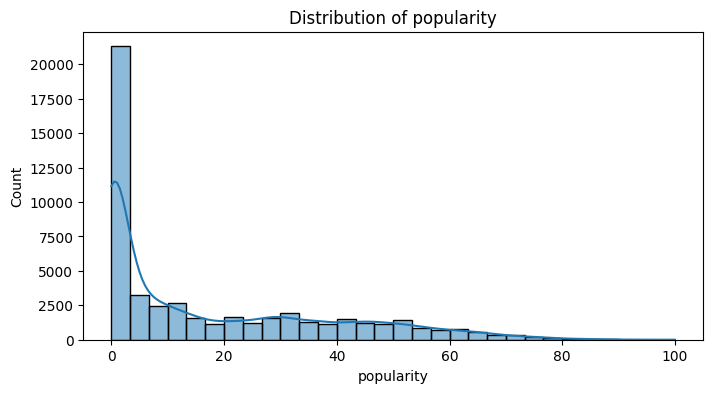

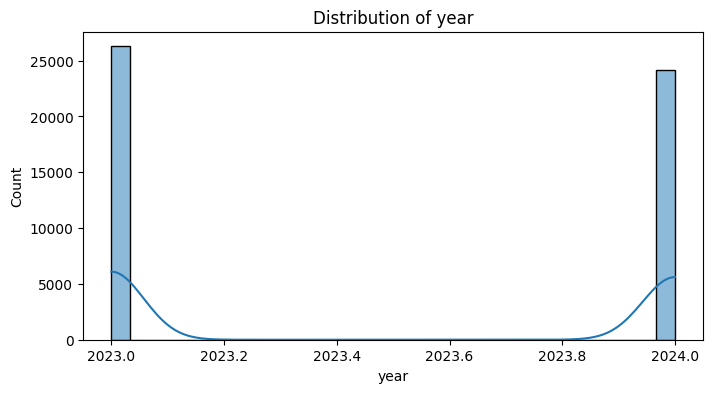

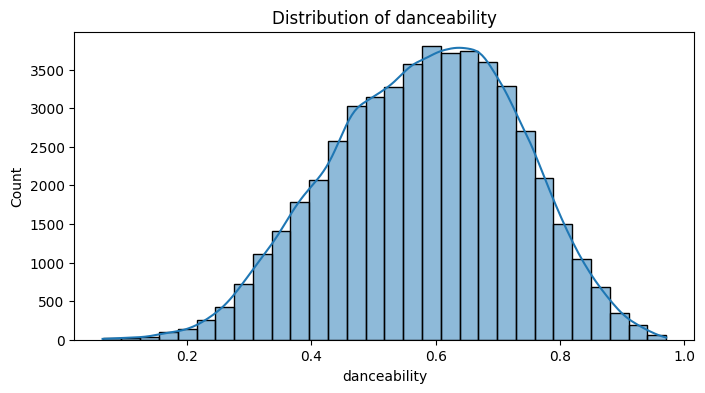

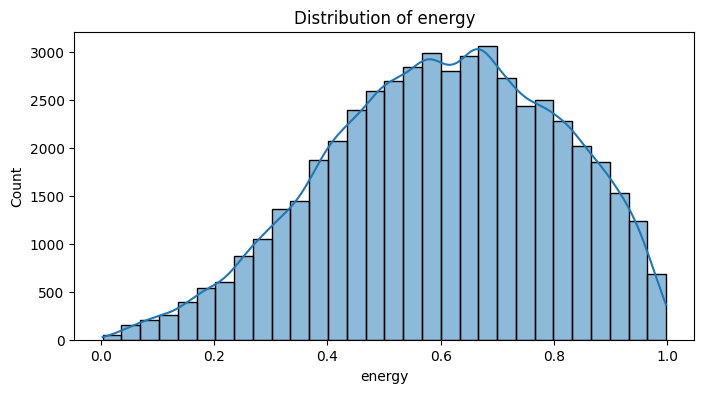

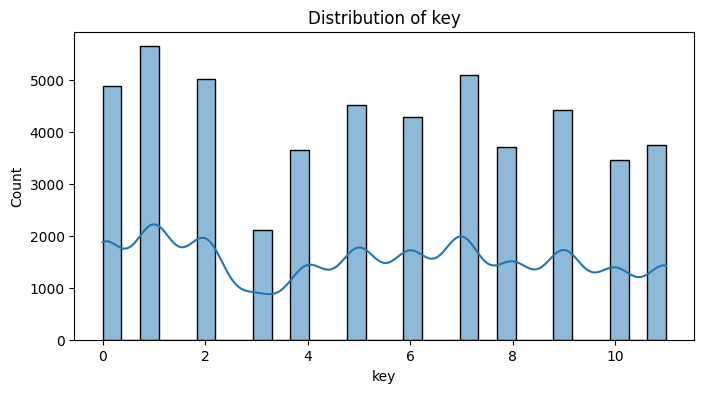

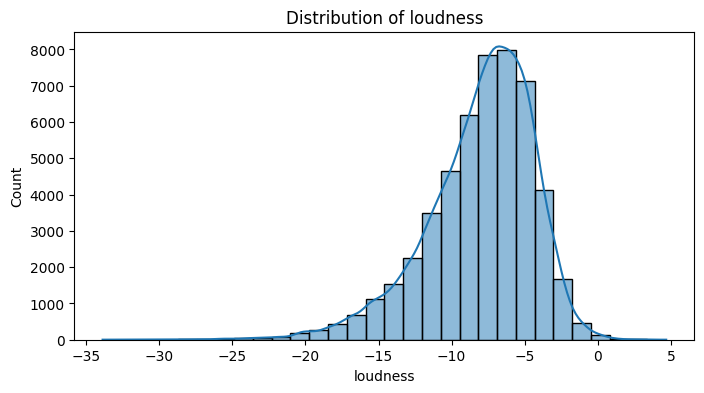

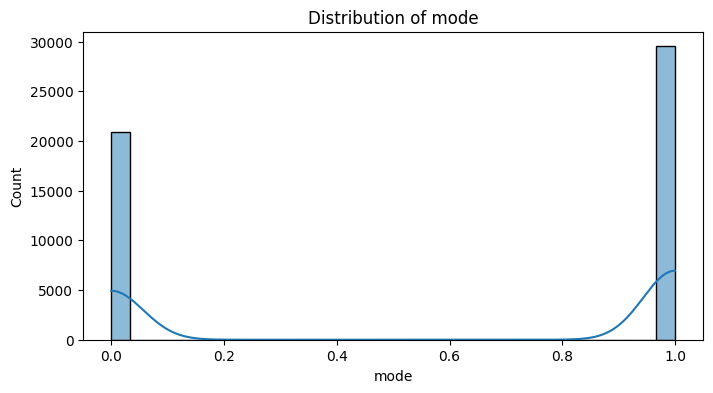

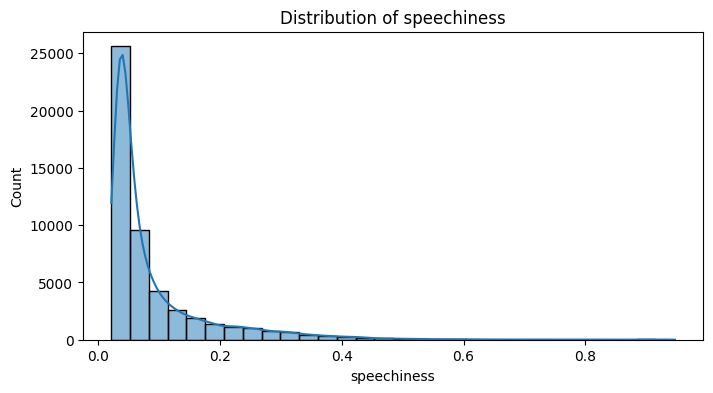

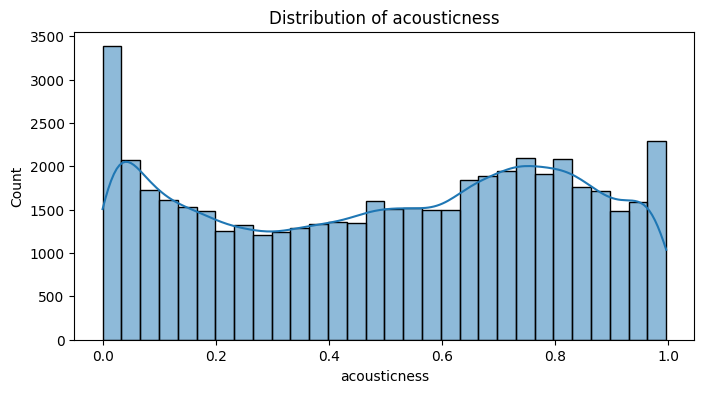

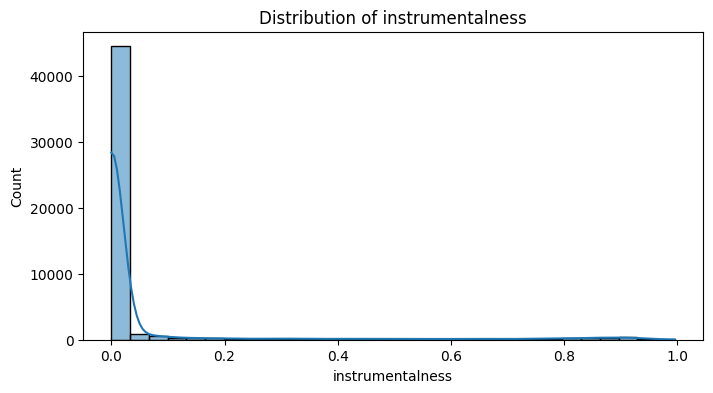

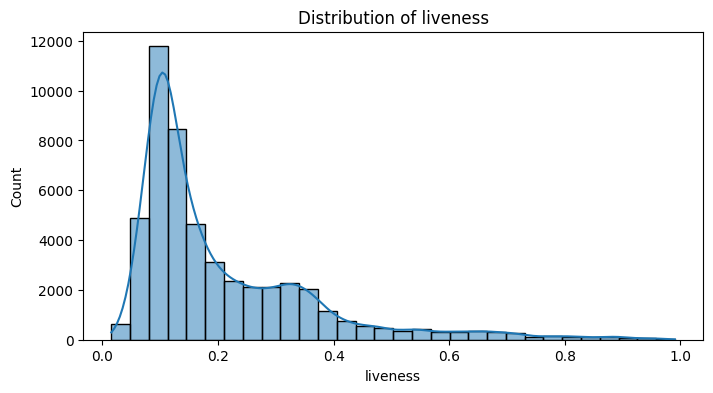

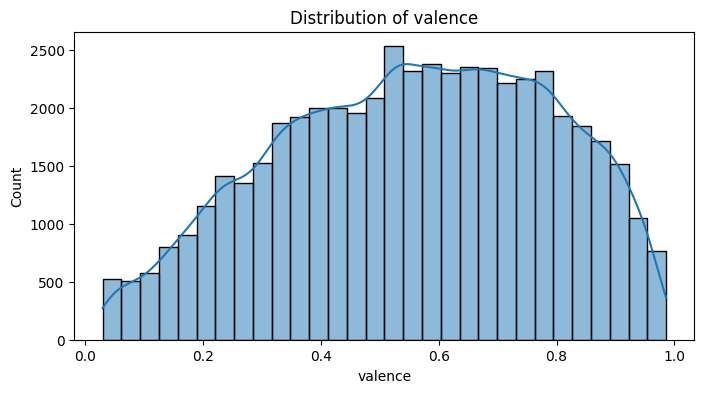

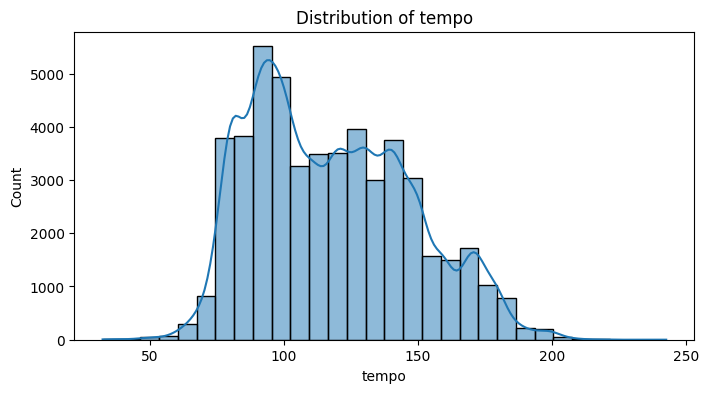

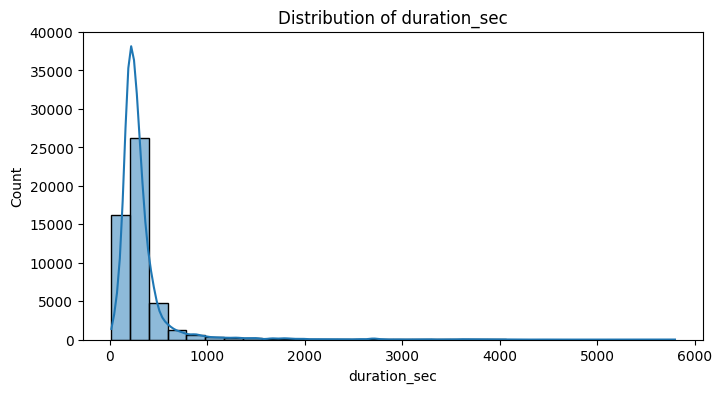

In [10]:
# Distribution plots for numerical columns
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


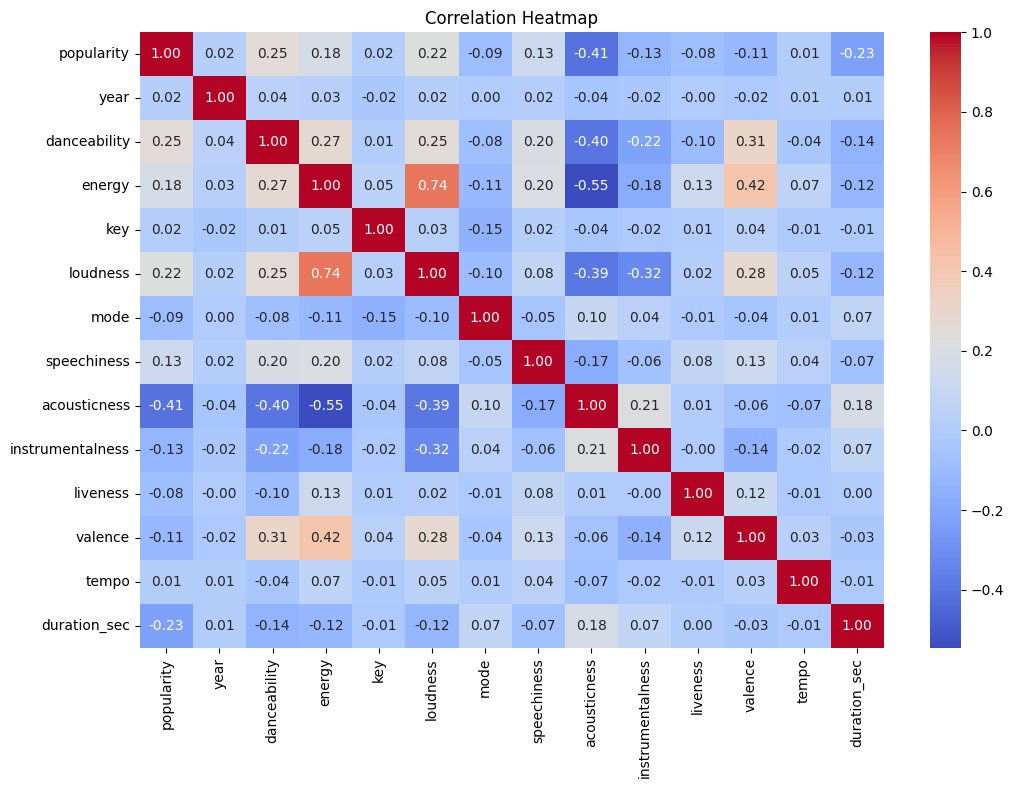

In [11]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


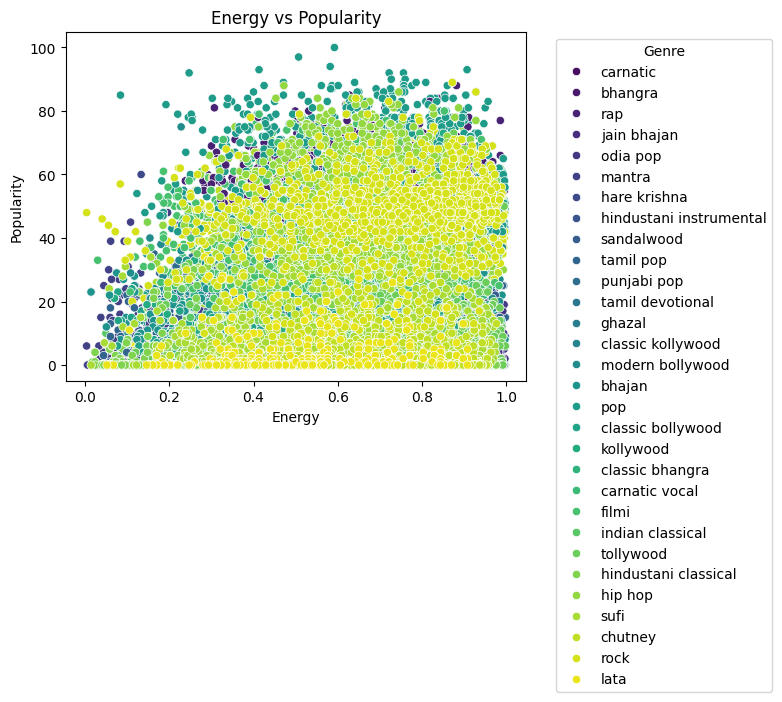

In [12]:
# Scatter plot for numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='energy', y='popularity', hue='genre', palette='viridis')  # Replace columns as needed
plt.title("Energy vs Popularity")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

Text(0.5, 1.02, 'Enhanced Pair Plot of Selected Features')

<Figure size 1200x1200 with 0 Axes>

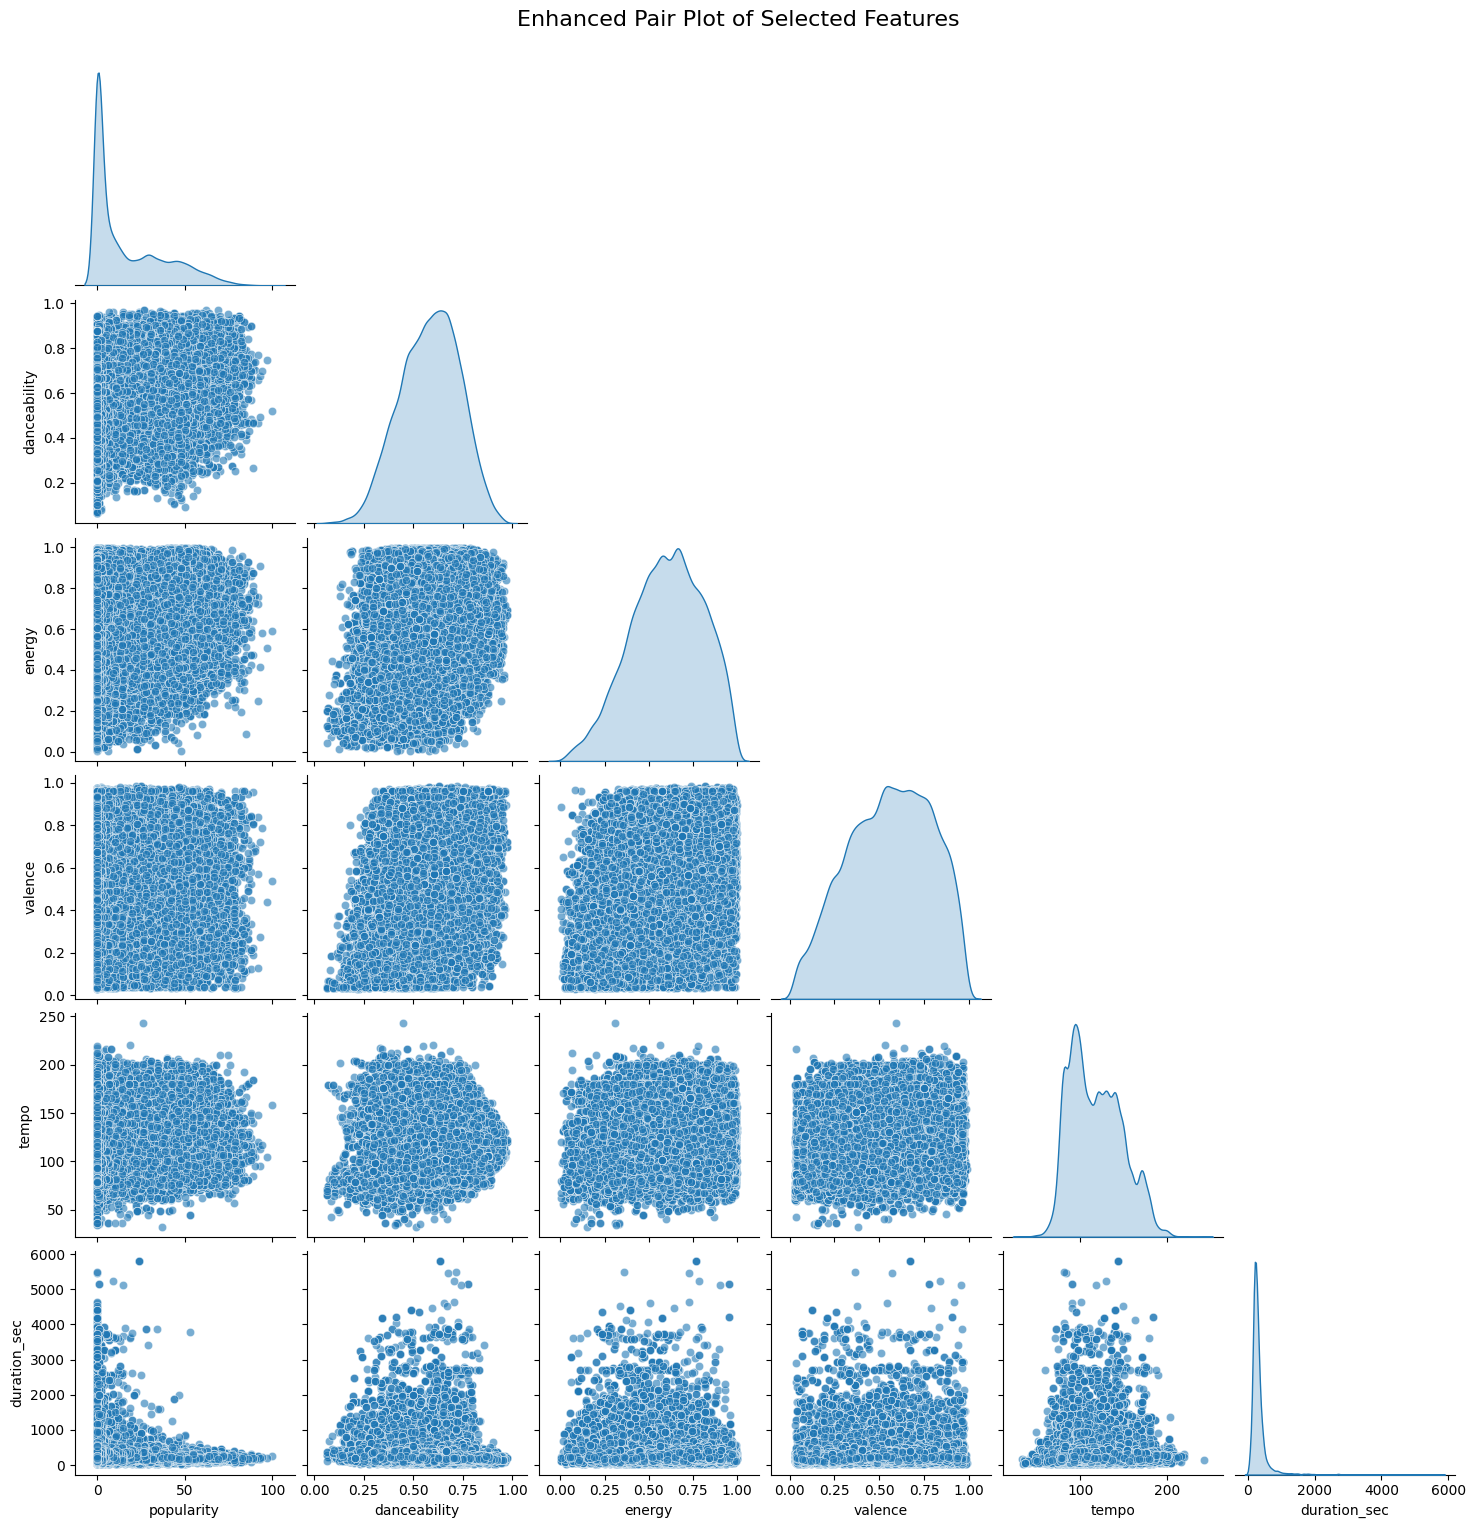

In [13]:
# Select a subset of features for better visualization
selected_features = ['popularity', 'danceability', 'energy', 'valence', 'tempo', 'duration_sec']

# Create a pair plot with enhanced visualization
plt.figure(figsize=(12, 12))
pairplot = sns.pairplot(
    dataset[selected_features],
    diag_kind="kde",  # Kernel density estimation for diagonal plots
    corner=True,      # Show only lower triangle of plots to avoid redundancy
    plot_kws={'alpha': 0.6},  # Adjust transparency for scatter plots
    height=2.5,       # Adjust the height of each subplot
    palette='viridis'
)

# Add a title to the entire pair plot
pairplot.fig.suptitle("Enhanced Pair Plot of Selected Features", y=1.02, fontsize=16)

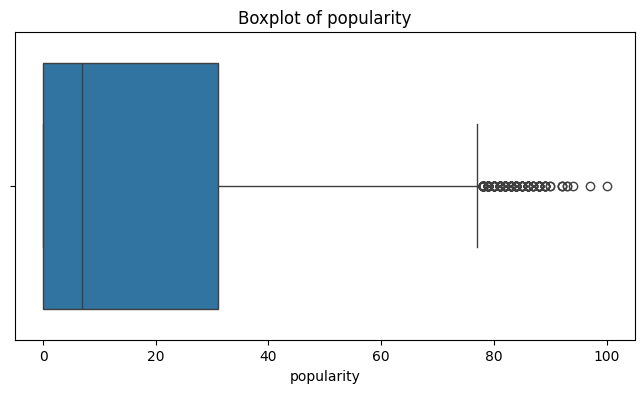

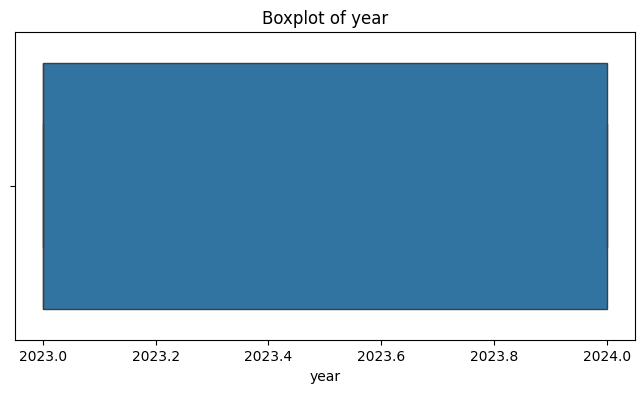

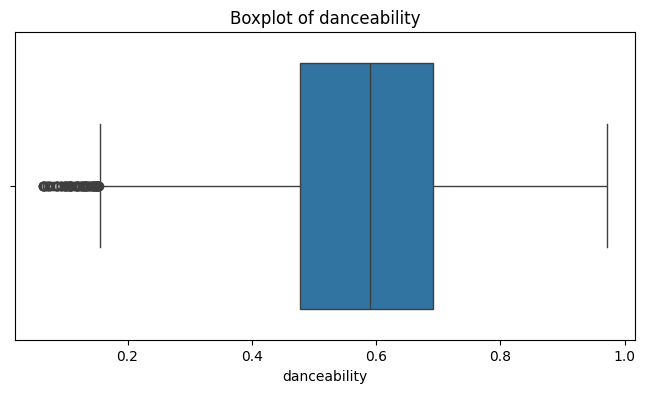

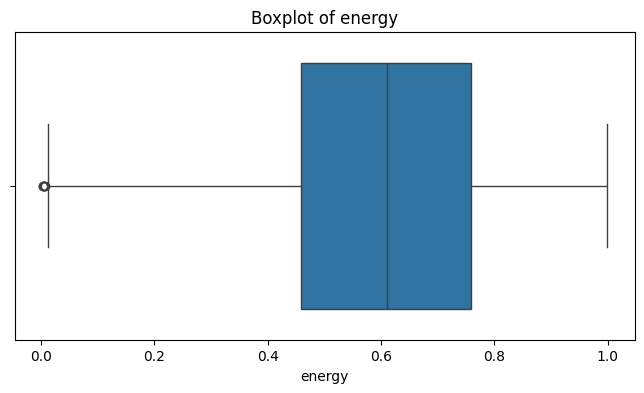

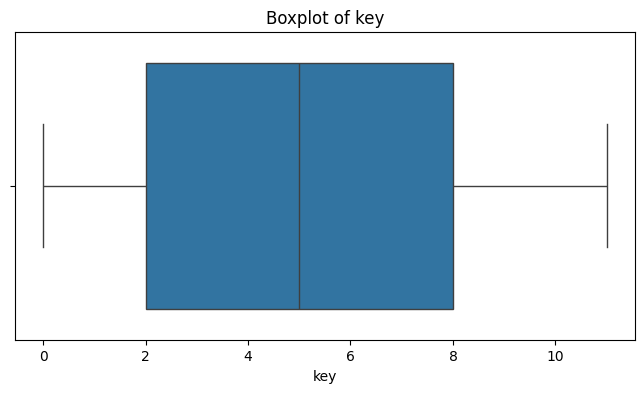

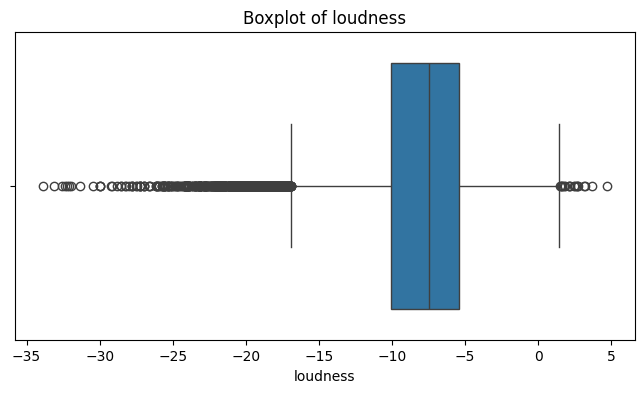

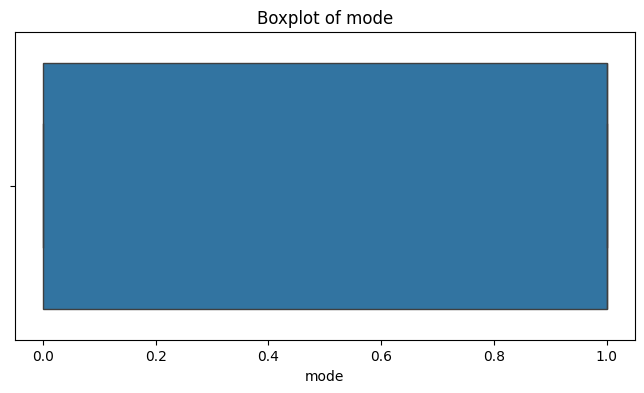

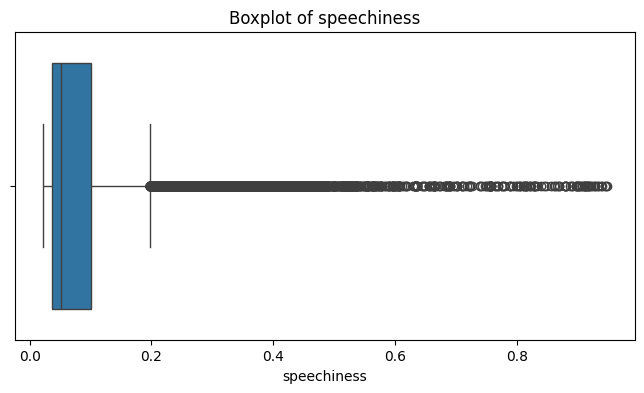

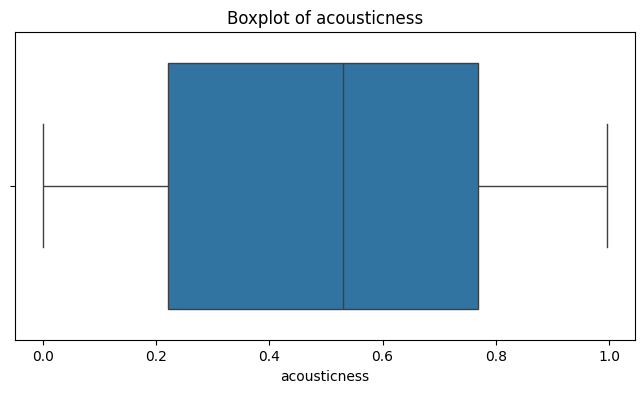

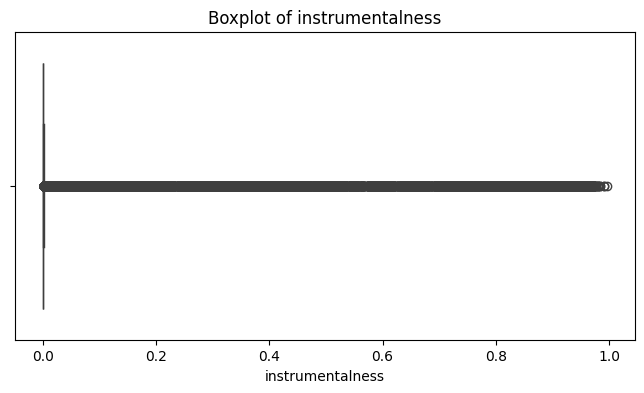

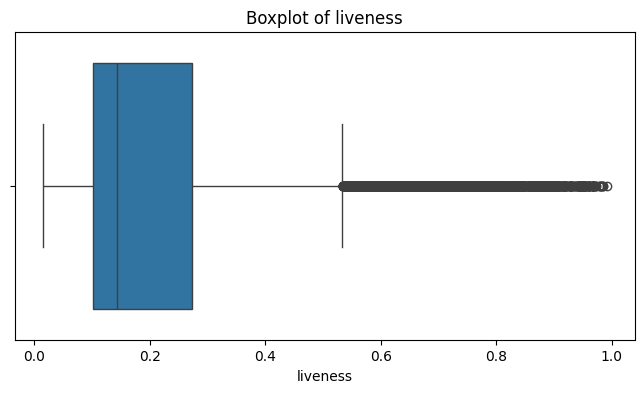

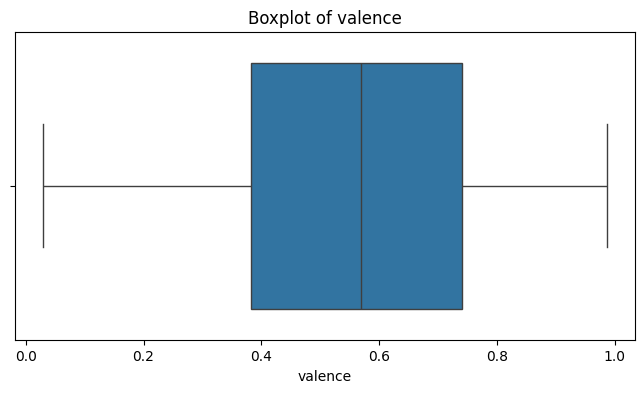

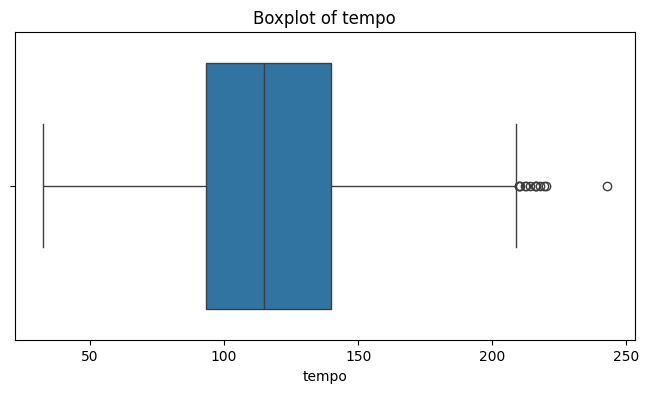

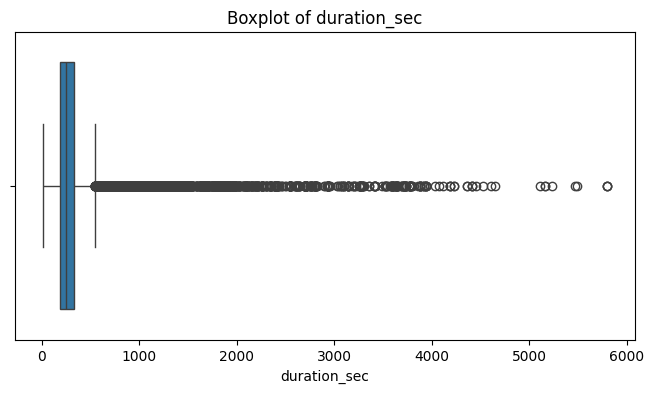

In [14]:
# Boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=dataset, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [15]:
# Identify duplicate rows
duplicate_rows = dataset[dataset.duplicated()]

# Print duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Count of duplicate rows
print(f"\nNumber of Duplicate Rows: {duplicate_rows.shape[0]}")


Duplicate Rows:
                                              track_name  \
100                                  Piecing It Together   
201                        Parandhamavati Jayati (Veena)   
203                                        Oruruvaayinai   
212                                 Giriraja Suta Tanaya   
222                              Idenna Adisayam (Veena)   
...                                                  ...   
50088                                      ANTHEM PART 3   
50277                   Mere Naseeb Mein - From "Naseeb"   
50377                                    Thukra Ke Mujhe   
50378  Paas Rehta Hai - From "Ameer Aadmi Ghareeb Aadmi"   
50382                              Kabhi Khamosh Ho Jana   

                                                  artist  \
100             Karthick Iyer, Indosoul by Karthick Iyer   
201                                 Ramana Balachandhran   
203    Sound Creed, Vittal Rangan, Sumesh Narayanan, ...   
212                    

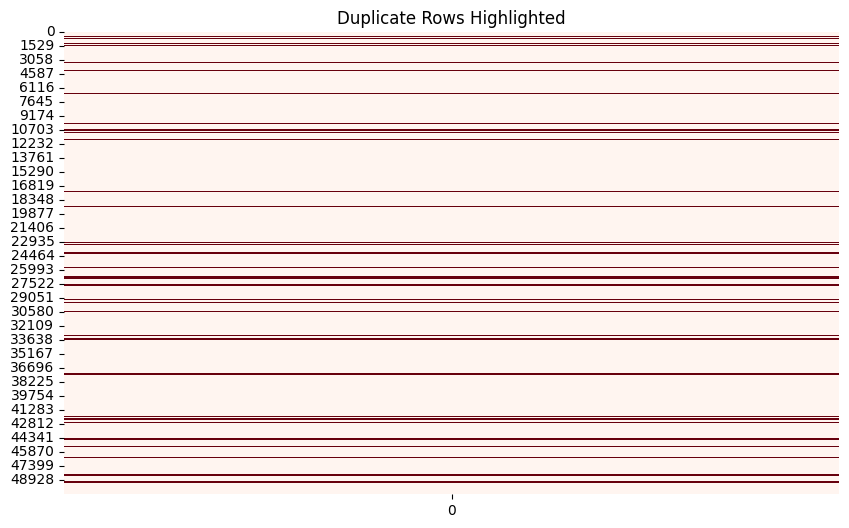

In [16]:
# Highlight duplicate rows in the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.duplicated(keep=False).values.reshape(-1, 1), cbar=False, cmap='Reds')
plt.title('Duplicate Rows Highlighted')
plt.show()


In [17]:
# Keep only the first occurrence of duplicates
dataset = dataset.drop_duplicates(keep='first')
# Check the new shape of the dataset
print(f"\nDataset Shape After Dropping Duplicates: {dataset.shape}")


Dataset Shape After Dropping Duplicates: (47188, 20)


<ipython-input-18-d8047d857aa0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, x='Genre', y='Number_of_Songs', palette='viridis')


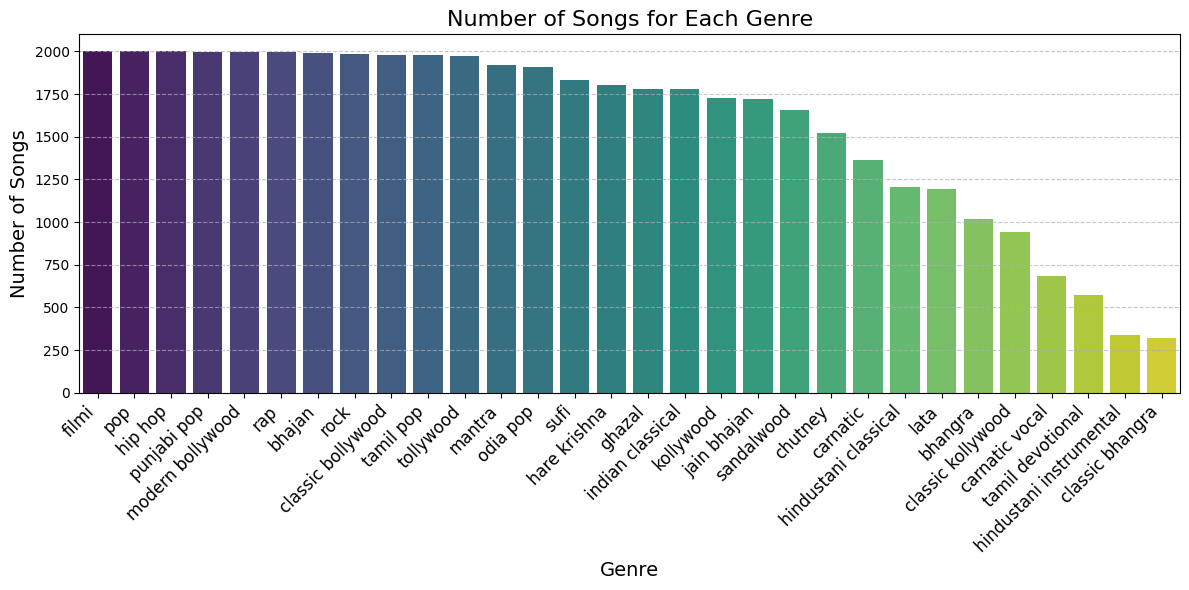

In [18]:
genre_counts = dataset['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Number_of_Songs']

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts, x='Genre', y='Number_of_Songs', palette='viridis')

# Customize the plot
plt.title('Number of Songs for Each Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-19-4ced534bdb5e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_artists, x='Number_of_Songs', y='Artist', palette='viridis')


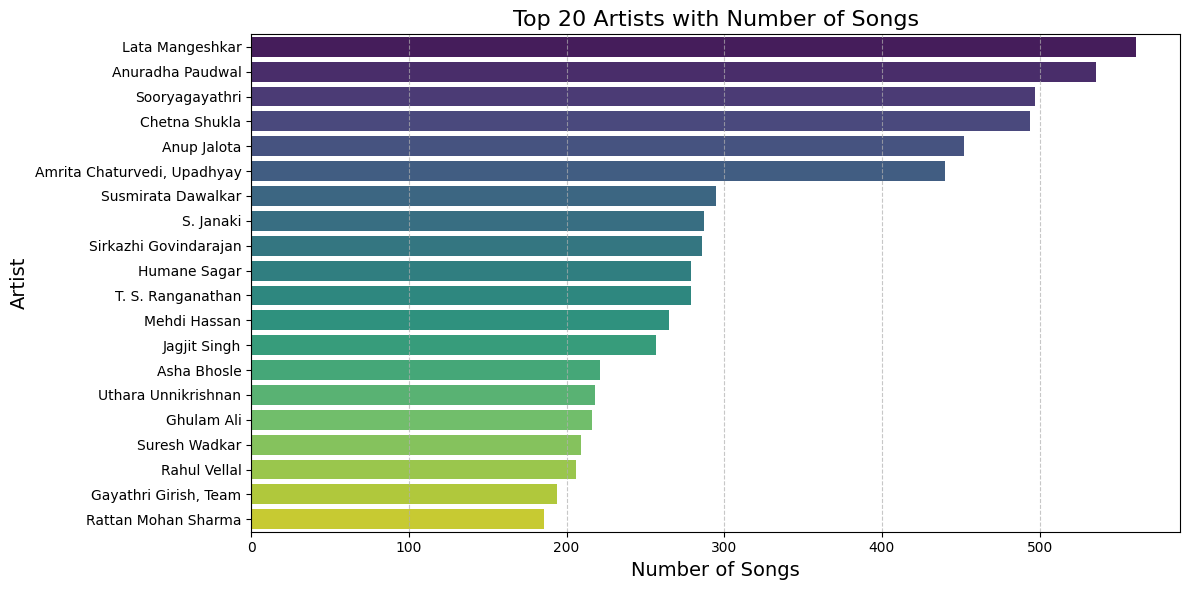

In [19]:
# Count the number of songs for each artist
artist_counts = dataset['artist'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Number_of_Songs']

# Get the top 20 artists
top_20_artists = artist_counts.head(20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_artists, x='Number_of_Songs', y='Artist', palette='viridis')

# Customize the plot
plt.title('Top 20 Artists with Number of Songs', fontsize=16)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-20-51c091983bf9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tracks, x='popularity', y='track_name', palette='viridis')


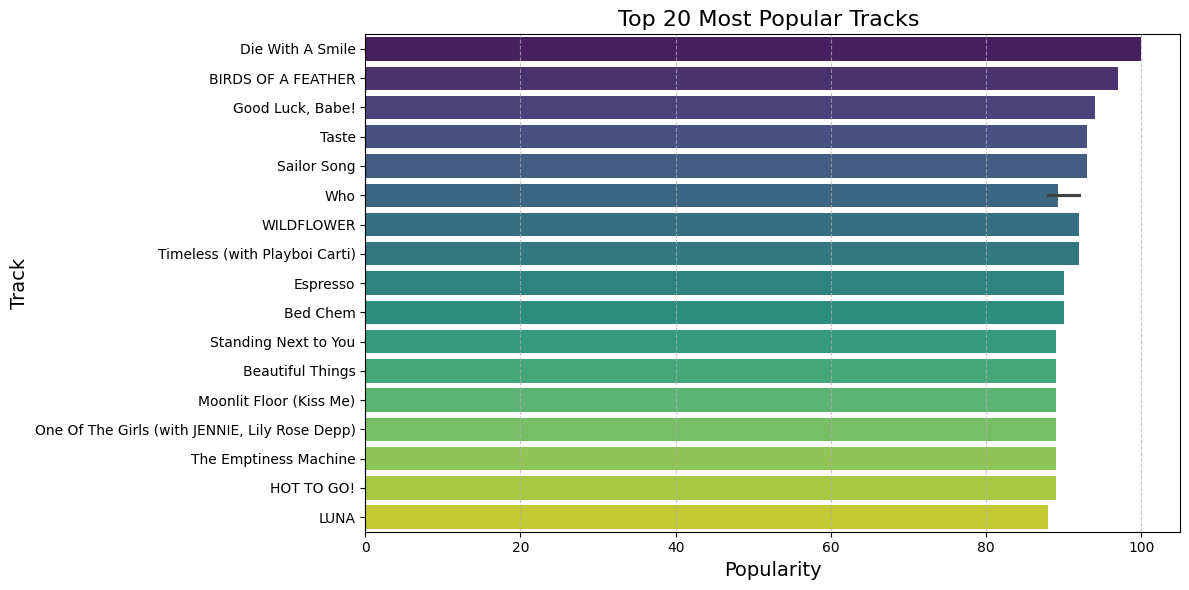

In [20]:
# Top 20 most popular tracks
top_tracks = dataset[['track_name', 'popularity']].sort_values(by='popularity', ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_tracks, x='popularity', y='track_name', palette='viridis')
# Customize the plot
plt.title('Top 20 Most Popular Tracks ', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Track', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-21-2a55152aeeef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')


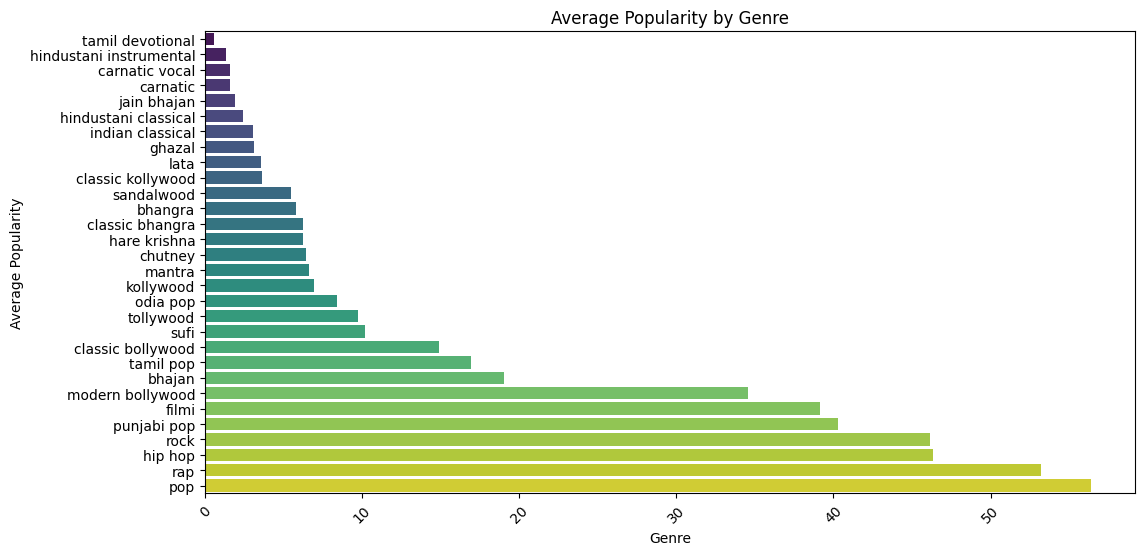

In [21]:

# Genre-wise Popularity
plt.figure(figsize=(12, 6))
genre_popularity = dataset.groupby('genre')['popularity'].mean().sort_values()
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')
plt.title("Average Popularity by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()



Top 10 Artists by Average Popularity:
artist
Lady Gaga, Bruno Mars    100.000000
Gigi Perez                93.000000
Feid, ATL Jacob           88.000000
Addison Rae               88.000000
Miley Cyrus               87.000000
Chappell Roan             86.166667
Shakira                   86.000000
Sabrina Carpenter         85.923077
Benson Boone              85.500000
LISA, ROSALÍA             85.000000
Name: popularity, dtype: float64


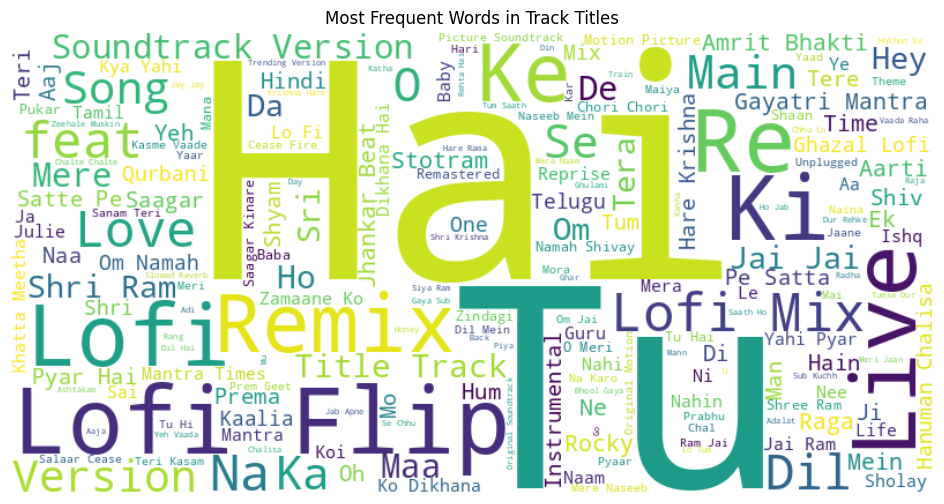

In [22]:

# Top 10 artists with the highest average popularity
artist_avg_popularity = dataset.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Artists by Average Popularity:")
print(artist_avg_popularity)

# Most frequent words in track titles
from wordcloud import WordCloud

track_titles = " ".join(dataset['track_name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(track_titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Track Titles")
plt.show()



Text(0.5, 1.0, 'Distribution of Songs by Year')

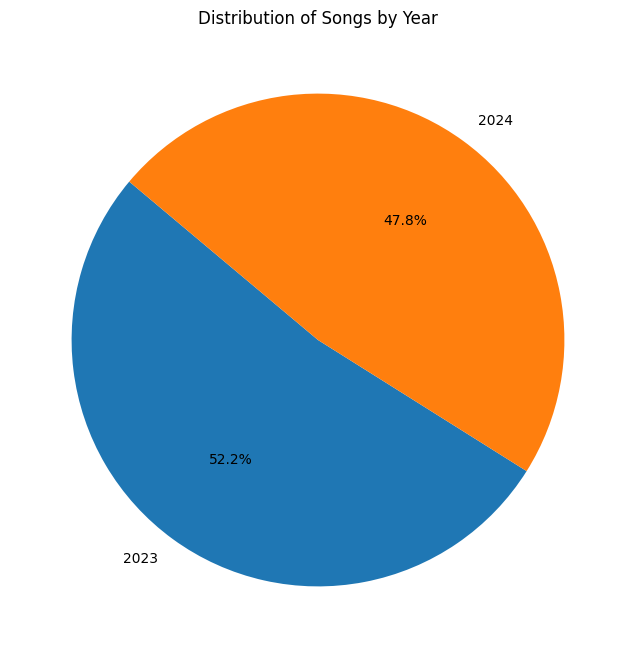

In [23]:
# Count the number of songs for each year
year_counts = dataset['year'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Songs by Year')

In [24]:
# Save the cleaned dataset as a CSV file
cleaned_file_path = '/content/cleaned_dataset.csv'  # Update this path as needed
dataset.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully at: {cleaned_file_path}")


Cleaned dataset saved successfully at: /content/cleaned_dataset.csv


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the cleaned dataset saved in the previous step
file_path = '/content/cleaned_dataset.csv'  # Replace with the actual file path
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(dataset.head())



                                          track_name                 artist  \
0     Shri Ram Jai Ram Jai Jai Ram (Gondavale chant)   Ramana Balachandhran   
1                               Ramachandraya Janaka         Sooryagayathri   
2                                        Ramashtakam    Uthara Unnikrishnan   
3                                    Sri ram jayaram  Gayathri Girish, Team   
4  Pet Lovers Anthem (Paal Mazhayin Thooralil) (F...        Rajhesh Vaidhya   

                                               album release_date  popularity  \
0     Shri Ram Jai Ram Jai Jai Ram (Gondavale chant)    3/12/2023          28   
1                               Ramachandraya Janaka   11/30/2023          26   
2                                        Ramashtakam    3/16/2023          27   
3  Yogi Ramsuratkumar Ashram Padalgal Volume 1 Ga...     5/9/2023          23   
4  Pet Lovers Anthem (Paal Mazhayin Thooralil) (F...     8/9/2023          20   

                 track_id  year     ge

In [26]:
# General Information
print("Dataset Shape:", dataset.shape)
print("Missing Values:\n", dataset.isnull().sum())
print("\nDataset Info:")
print(dataset.info())

Dataset Shape: (47188, 20)
Missing Values:
 track_name          0
artist              0
album               1
release_date        0
popularity          0
track_id            0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_sec        0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47188 entries, 0 to 47187
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        47188 non-null  object 
 1   artist            47188 non-null  object 
 2   album             47187 non-null  object 
 3   release_date      47188 non-null  object 
 4   popularity        47188 non-null  int64  
 5   track_id          47188 non-null  object 
 6 

In [27]:

# Encode categorical features genre using Label Encoding
label_encoder = LabelEncoder()
dataset['genre_encoded'] = label_encoder.fit_transform(dataset['genre'])

# View mapping of genres to encoded values
genre_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Genre Mapping:", genre_mapping)

Genre Mapping: {'bhajan': 0, 'bhangra': 1, 'carnatic': 2, 'carnatic vocal': 3, 'chutney': 4, 'classic bhangra': 5, 'classic bollywood': 6, 'classic kollywood': 7, 'filmi': 8, 'ghazal': 9, 'hare krishna': 10, 'hindustani classical': 11, 'hindustani instrumental': 12, 'hip hop': 13, 'indian classical': 14, 'jain bhajan': 15, 'kollywood': 16, 'lata': 17, 'mantra': 18, 'modern bollywood': 19, 'odia pop': 20, 'pop': 21, 'punjabi pop': 22, 'rap': 23, 'rock': 24, 'sandalwood': 25, 'sufi': 26, 'tamil devotional': 27, 'tamil pop': 28, 'tollywood': 29}


In [28]:
# Drop non-numerical and irrelevant columns
columns_to_drop = [
    'track_name', 'artist', 'album', 'track_id', 'release_date', 'genre','year'
]
dataset = dataset.drop(columns=columns_to_drop, axis=1)
print(dataset)

       popularity  danceability  energy  key  loudness  mode  speechiness  \
0              28         0.391   0.210    8    -7.376     1       0.0544   
1              26         0.664   0.627    3    -6.571     1       0.0484   
2              27         0.624   0.331    0    -9.444     1       0.0378   
3              23         0.644   0.444    6    -5.847     1       0.0296   
4              20         0.479   0.536    4    -9.698     1       0.0353   
...           ...           ...     ...  ...       ...   ...          ...   
47183           0         0.492   0.521    9    -9.678     1       0.0408   
47184           0         0.348   0.312   10   -19.278     0       0.0498   
47185           0         0.334   0.360    9   -11.609     1       0.0365   
47186           0         0.431   0.459    2   -10.164     1       0.0307   
47187           0         0.705   0.429    8    -7.589     1       0.0315   

       acousticness  instrumentalness  liveness  valence    tempo  \
0     

In [29]:
# Define features (X) and target variable (y)
X = dataset.drop('popularity', axis=1)
y = dataset['popularity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Print shapes of processed data
print("Training Features Shape:", X_train_scaled.shape)
print("Testing Features Shape:", X_test_scaled.shape)
print("Target Variable Shape:", y_train.shape)

Training Features Shape: (37750, 13)
Testing Features Shape: (9438, 13)
Target Variable Shape: (37750,)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import joblib

# Sample the data for quick testing
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train_scaled, y_train, test_size=0.7, random_state=42
)

# Specify hyperparameters for Random Forest and Gradient Boosting
predefined_params = {
    "Random Forest": {
        'n_estimators': 200,
        'max_depth': 10,
        'min_samples_split': 2,
        'min_samples_leaf': 4
    },
    "Gradient Boosting": {
        'subsample': 1.0,
        'n_estimators': 100,
        'max_depth': 5,
        'learning_rate': 0.1
    }
}

# Define models with hyperparameters
base_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, **predefined_params["Random Forest"]),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, **predefined_params["Gradient Boosting"])
}

# Dictionary to store performance metrics
performance = {}

# Train and evaluate each model
for name, model in base_models.items():
    print(f"\nTraining {name}...")

    # Train the model on the sample data
    model.fit(X_train_sample, y_train_sample)

    # Train the model on the full dataset
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate performance metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Store metrics
    performance[name] = {
        "Train MSE": mse_train,
        "Test MSE": mse_test,
        "Train R2": r2_train,
        "Test R2": r2_test
    }

# Display the performance metrics
performance_df = pd.DataFrame(performance).T
performance_df = performance_df.sort_values(by="Test R2", ascending=False)
print("\nModel Performance Metrics:")
print(performance_df)

# Identify the best-performing model
best_model_name = performance_df.index[0]
print(f"\nThe best model is: {best_model_name}")

# Train the best-performing model
best_model = base_models[best_model_name]
best_model.fit(X_train_scaled, y_train)

# Save the best-performing model
joblib.dump(best_model, 'best_model.joblib')
print("Best model saved successfully as best_model.joblib")



Training Linear Regression...

Training Random Forest...

Training Gradient Boosting...

Model Performance Metrics:
                    Train MSE    Test MSE  Train R2   Test R2
Random Forest       79.375878  101.045505  0.819066  0.766833
Gradient Boosting   92.752081  102.304092  0.788576  0.763928
Linear Regression  325.460535  317.370157  0.258126  0.267653

The best model is: Random Forest
Best model saved successfully as best_model.joblib


In [31]:
#save the standard scaler used by joblib

joblib.dump(scaler, 'standard_scaler.joblib')
print("Standard scaler saved successfully as standard_scaler.joblib")

Standard scaler saved successfully as standard_scaler.joblib


In [32]:
import joblib

try:
    # Load the saved model
    model = joblib.load('best_model.joblib')

    # Check the type of the loaded model
    print("Model loaded successfully:", type(model))
except Exception as e:
    print("Error loading model:", e)


Model loaded successfully: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
